# Leitura dos dados

In [41]:
import pandas as pd

In [42]:
def recupera_poemas(url):
    poemas_df = pd.read_csv(url, usecols = ['Título', 'Texto', 'Estudante', 'Série', 'Edição'])
    return poemas_df

In [43]:
POEMAS_URL = 'https://gist.githubusercontent.com/JRobsonJr/52179d3696e6f3eec5697784a851d14b/raw/b948b74c9d2ba5cd9fe6e98612e728c99456e679/poemas.csv'
poemas_df = recupera_poemas(POEMAS_URL)
poemas_df.head()

,Título,Texto,Estudante,Série,Edição
0,'Uma criança feliz','Uma criança feliz que acaba de nascer\nUma cr...,Ana Beatriz de Abreu Lira,6,2010
1,'Nas ondas dos versos',"'Nas ondas dos versos,\neu escrevo estas palav...",Anderson Candeia Porto,6,2010
2,'As flores','As flores são bonitas\ntambém muito coloridas...,Brennda Cristhine de A. Moreira,6,2010
3,'Sua Bandeira','Vou fazer uma pergunta\nQue não é brincadeira...,Carolinna Felix Dantas de Oliveira,6,2010
4,'Amigas','Eu tenho amigas muito legais\nElas são muito ...,Emma Dantas Medeiros,6,2010


# Funções e variáveis gerais

In [44]:
from collections import Counter, defaultdict

In [45]:
import nltk
nltk.download(['punkt'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
def recupera_stopwords(caminho_arquivo):
    with open(caminho_arquivo, 'r') as f:
        stopwords = f.readline().split(',')
        return stopwords

In [47]:
def remove_caracteres_indesejados(palavra):
    return ''.join([c if c.isalpha() else ' ' for c in palavra])

def limpa_texto(string):
    return ' '.join(remove_caracteres_indesejados(string).split())

In [48]:
stopwords = 'a,algo,algum,alguma,algumas,alguns,ao,aos,apenas,apesar,após,aquela,aquelas,aquele,aqueles,aquilo,as,assim,até,cada,cerca,certa,certas,certos,com,comigo,como,da,daquela,daquele,daqueles,daquilo,das,de,dela,delas,dele,deles,dentre,desde,dessa,dessas,desse,desta,deste,diferentes,disso,diversas,do,dos,duma,e,ela,elas,ele,eles,em,embora,enquanto,entanto,entre,entretanto,então,era,eram,essa,essas,esse,esses,esta,estamos,estando,estar,estarei,estaremos,estaria,estará,estarão,estas,estava,estavam,este,esteja,estejam,estejamos,estes,esteve,estive,estivemos,estiver,estivera,estiveram,estiverem,estivermos,estivesse,estivessem,estivéramos,estivéssemos,estou,está,estás,estávamos,estão,eu,exceto,foi,fomos,for,fora,foram,forem,fores,formos,fosse,fossem,fui,fôramos,fôssemos,haja,hajam,hajamos,havemos,haver,haveria,haverá,havia,haviam,hei,houve,houvemos,houver,houvera,houveram,houverei,houverem,houveremos,houveria,houveriam,houvermos,houverá,houverão,houveríamos,houvesse,houvessem,houvéramos,houvéssemos,há,hão,ia,iam,ir,irei,iremos,iria,irá,irás,irão,iríamos,isso,isto,já,la,las,lhe,lhes,lo,los,mais,mas,me,mesma,mesmas,mesmo,mesmos,meu,meus,mim,minha,minhas,muita,muitas,muito,muitos,na,naquela,naquele,naqueles,nas,nela,nele,neles,nem,nenhum,nenhuma,nessa,nessas,nesse,nesses,nesta,neste,nisso,no,nos,nossa,nossas,nosso,nossos,num,numa,não,né,nóis,nós,o,os,ou,outra,outras,outro,outros,para,pela,pelas,pelo,pelos,pois,por,porque,porém,poucas,poucos,pra,pro,própria,próprias,próprio,próprios,quais,qual,qualquer,quando,quanta,quantas,quanto,que,quem,quão,quê,se,seja,sejam,sejamos,sejas,sem,sendo,ser,serei,seremos,seria,seriam,sermos,será,serão,seríamos,seu,seus,si,sob,sobre,somente,somos,sou,sua,suas,são,sê,só,tal,também,tanta,tantas,tanto,tantos,te,tem,temos,tendo,tenha,tenham,tenhamos,tenho,tens,ter,terei,teremos,teria,teriam,terá,terão,teríamos,teu,teus,teve,ti,tinha,tinham,tive,tivemos,tiver,tivera,tiveram,tiverem,tiveres,tivermos,tivesse,tivessem,tivéramos,tivéssemos,toda,todas,todo,todos,tu,tua,tuas,tá,tão,tém,tê,têm,tínhamos,um,uma,umas,uns,vai,vamos,você,vocês,vos,vosso,vou,vá,várias,vários,vão,vós,à,àquele,às,é,éramos,és'.split(',')

# Pré-processamentos dos dados

In [49]:
def limpa_coluna(coluna):
    poemas_df[coluna] = poemas_df[coluna].apply(lambda texto: texto.replace('…', '...'))
    poemas_df[coluna] = poemas_df[coluna].apply(lambda texto: texto.replace('\\t', ' '))
    poemas_df[f'{coluna} Limpo'] = poemas_df[coluna].apply(eval).apply(limpa_texto).apply(str.lower)

In [50]:
limpa_coluna('Título')
limpa_coluna('Texto')

In [51]:
poemas_df.head()

,Título,Texto,Estudante,Série,Edição,Título Limpo,Texto Limpo
0,'Uma criança feliz','Uma criança feliz que acaba de nascer\nUma cr...,Ana Beatriz de Abreu Lira,6,2010,uma criança feliz,uma criança feliz que acaba de nascer uma cria...
1,'Nas ondas dos versos',"'Nas ondas dos versos,\neu escrevo estas palav...",Anderson Candeia Porto,6,2010,nas ondas dos versos,nas ondas dos versos eu escrevo estas palavras...
2,'As flores','As flores são bonitas\ntambém muito coloridas...,Brennda Cristhine de A. Moreira,6,2010,as flores,as flores são bonitas também muito coloridas a...
3,'Sua Bandeira','Vou fazer uma pergunta\nQue não é brincadeira...,Carolinna Felix Dantas de Oliveira,6,2010,sua bandeira,vou fazer uma pergunta que não é brincadeira p...
4,'Amigas','Eu tenho amigas muito legais\nElas são muito ...,Emma Dantas Medeiros,6,2010,amigas,eu tenho amigas muito legais elas são muito le...


# Geração de wordcloud de palavras mais utilizadas

## Definindo funções

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [53]:
def exibe_wordcloud(stopwords, texto):
    wordcloud = WordCloud(
        stopwords = stopwords,
        width = 1600,
        height = 800,
        background_color = 'white',
        prefer_horizontal = 1,
    ).generate(texto)
    wordcloud.to_file('wc.png')

    plt.figure(figsize = (12, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

## Aplicação

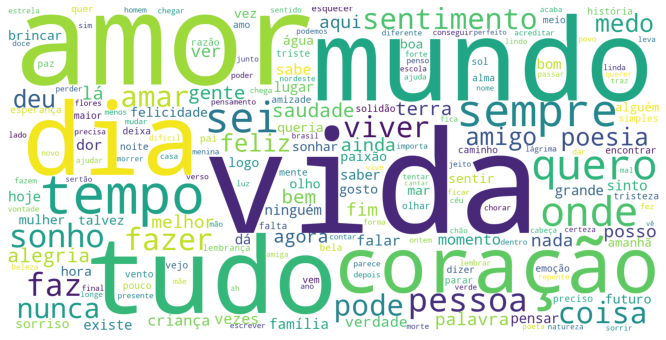

In [54]:
textos_limpos = ' '.join(poemas_df['Texto Limpo'])
exibe_wordcloud(stopwords, textos_limpos)

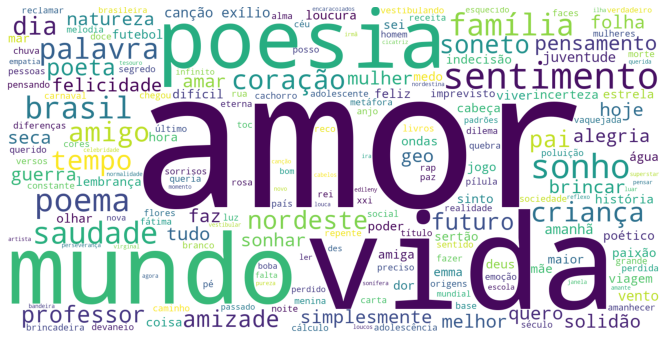

In [55]:
titulos_limpos = ' '.join(poemas_df['Título Limpo'])
exibe_wordcloud(stopwords, titulos_limpos)

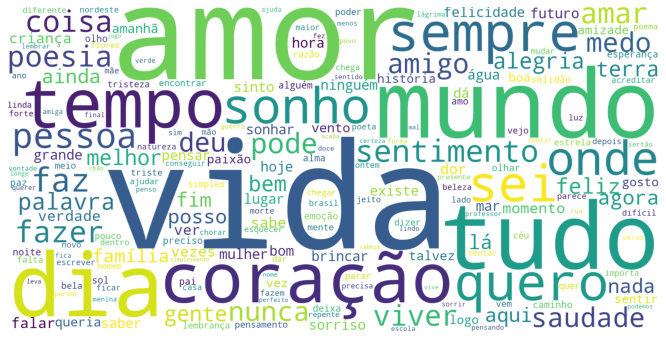

In [56]:
total_limpos = titulos_limpos + ' ' + textos_limpos
exibe_wordcloud(stopwords, total_limpos)

# Extração de características textuais

## Definindo funções

In [57]:
from collections import Counter

def encontra_palavras_raras(texto):
    contador = Counter(texto.split())
    palavras_raras = set()

    for (palavra, valor) in contador.items():
        if (valor == 1):
            palavras_raras.add(palavra)

    return palavras_raras

def calcula_n_palavras(texto):
    return len(texto.split())
    
def calcula_n_palavras_unicas(texto):
    return len(set(texto.split()))
    
def calcula_n_caracteres(texto):
    return sum([len(palavra) for palavra in texto.split()])

def calcula_n_versos(texto):
    return 1 + texto.count('\\n') - texto.count('\\n\\n')

def calcula_n_estrofes(texto):
    return 1 + texto.count('\\n\\n')

def calcula_estrutura(texto):
    estrofes = texto.split('\\n\\n')
    return str([len(estrofe.split('\\n')) for estrofe in estrofes])

def calcula_n_palavras_raras(texto):
    n_raras = 0
    for palavra in texto.split():
        if palavra in palavras_raras:
            n_raras += 1
    return n_raras

## Aplicação

In [58]:
palavras_raras = encontra_palavras_raras(' '.join(poemas_df['Título Limpo'] + poemas_df['Texto Limpo']))

In [59]:
textos_limpos = ' '.join(poemas_df['Texto Limpo'])
palavras_raras = encontra_palavras_raras(textos_limpos)
n_palavras = len(textos_limpos.split())
n_palavras_unicas = len(set(textos_limpos.split()))
n_palavras_raras = len(palavras_raras)

print(f'Ao todo, há {n_palavras} palavras somando todos os poemas, ' \
      f'sendo {n_palavras_unicas} diferentes entre si ' \
      f'e {n_palavras_raras} raras (ocorrendo apenas uma vez).')

Ao todo, há 45862 palavras somando todos os poemas, sendo 6475 diferentes entre si e 3640 raras (ocorrendo apenas uma vez).


In [60]:
poemas_df['n Palavras'] = poemas_df['Texto Limpo'].apply(calcula_n_palavras)
poemas_df['n Palavras Únicas'] = poemas_df['Texto Limpo'].apply(calcula_n_palavras_unicas)
poemas_df['Diversidade Lexical'] = poemas_df['n Palavras Únicas'] / poemas_df['n Palavras']
poemas_df['n Palavras Raras'] = poemas_df['Texto Limpo'].apply(calcula_n_palavras_raras)
poemas_df['Taxa de Palavras Raras'] =  poemas_df['n Palavras Raras'] / poemas_df['n Palavras']
poemas_df['n Caracteres'] = poemas_df['Texto Limpo'].apply(calcula_n_caracteres)
poemas_df['Média de Tamanho de Palavras'] = poemas_df['n Caracteres'] / poemas_df['n Palavras']

poemas_df['n Versos'] = poemas_df['Texto'].apply(calcula_n_versos)
poemas_df['Palavras por verso'] = poemas_df['n Palavras'] / poemas_df['n Versos']
poemas_df['n Estrofes'] = poemas_df['Texto'].apply(calcula_n_estrofes)
poemas_df['Estrutura'] = poemas_df['Texto'].apply(calcula_estrutura)

In [61]:
poemas_df.describe()

,Série,Edição,n Palavras,n Palavras Únicas,Diversidade Lexical,n Palavras Raras,Taxa de Palavras Raras,n Caracteres,Média de Tamanho de Palavras,n Versos,Palavras por verso,n Estrofes
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,5.112573,2014.406433,67.049708,45.694444,0.713761,5.321637,0.080217,289.527778,4.346221,14.324561,4.731680,3.491228
std,2.946654,2.886585,37.717147,23.385844,0.131790,5.311007,0.074000,163.699321,0.520952,7.299085,1.907648,1.709909
min,1.000000,2010.000000,2.000000,2.000000,0.240000,0.000000,0.000000,8.000000,2.909091,1.000000,1.142857,1.000000
25%,2.000000,2012.000000,44.000000,31.000000,0.628480,2.000000,0.037668,190.000000,4.026931,10.000000,3.887255,2.000000
50%,6.000000,2014.000000,63.000000,43.000000,0.716234,4.000000,0.069687,267.000000,4.315944,14.000000,4.553640,4.000000
75%,8.000000,2017.000000,83.000000,57.000000,0.800000,7.000000,0.106486,354.250000,4.592379,17.000000,5.333333,4.000000
max,9.000000,2019.000000,363.000000,210.000000,1.000000,45.000000,1.000000,1625.000000,8.205128,84.000000,42.000000,14.000000


#### Visualizações

In [62]:
# poemas_df.groupby('Estrutura').size().reset_index(name = 'Quantidade').sort_values(by = 'Quantidade', ascending = False).head(10)

[Text(0, 0.5, 'Frequência relativa'), Text(0.5, 1.0, 'Tamanho dos poemas')]

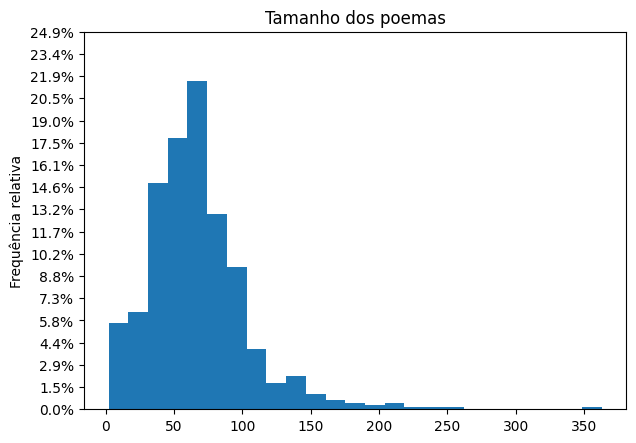

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
%matplotlib inline

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = poemas_df['n Palavras']
plt.hist(x, bins= 25)

plt.gca().yaxis.set_major_formatter(PercentFormatter(684))
plt.yticks(np.arange(0, 171, 10))
plt.gca().set(title = 'Tamanho dos poemas', ylabel = 'Frequência relativa')

# Part-of-Speech Tagging



Nesta seção, utilizei a biblioteca `nlpnet` para classificar os termos com *part-of-speech*.

Embora a biblioteca dê resultados mais específicos em alguns casos, decidi mapeá-los nas classes gramaticais:
- substantivo;
- verbo;
- adjetivo;
- pronome;
- artigo;
- numeral;
- preposição;
- conjunção;
- interjeição;
- advérbio;
- palavra denotativa.

## Definindo funções

In [64]:
!pip install nlpnet
import nlpnet
nlpnet.set_data_dir('/content/drive/MyDrive/robson/Código/data/pos-pt') # Disponível em http://nilc.icmc.usp.br/nlpnet/models.html#id2

tagger = nlpnet.POSTagger()

In [65]:
tags_nlpnet = ['ART', 'N', 'ADJ', 'KS', 'V', 'PREP', 'PROADJ', 'PRO-KS', 'ADV',
               'PROSUB', 'PREP+ART', 'PROPESS', 'KC', 'NUM', 'PDEN', 'PCP',
               'PREP+PRO-KS', 'NPROP', 'ADV-KS', 'PREP+PROPESS', 'PU',
               'PREP+ADV', 'IN', 'PREP+PROADJ', 'PREP+PROSUB']

tags_mapeamento = {'ADJ': 'Adjetivo',
                   'ADV': 'Advérbio',
                   'ADV-KS': 'Advérbio Conectivo Subordinativo',
                   'ART': 'Artigo',
                   'IN': 'Interjeição',
                   'KC': 'Conjunção Coordenativa',
                   'KS': 'Conjunção Subordinativa',
                   'N': 'Nome',
                   'NPROP': 'Nome Próprio',
                   'NUM': 'Numeral',
                   'PCP': 'Particípio',
                   'PDEN': 'Palava Denotativa',
                   'PREP': 'Preposição',
                   'PREP+ADV': 'Preposição + Advérbio',
                   'PREP+ART': 'Preposição + Artigo',
                   'PREP+PRO-KS': 'Preposição + Pronome Conectivo Subordinativo',
                   'PREP+PROADJ': 'Preposição + Pronome Adjetivo',
                   'PREP+PROPESS': 'Preposição + Pronome Pessoal',
                   'PREP+PROSUB': 'Preposição + Pronome Substantivo',
                   'PRO-KS': 'Pronome Conectivo Subordinativo',
                   'PROADJ': 'Pronome Adjetivo',
                   'PROPESS': 'Pronome Pessoal',
                   'PROSUB': 'Pronome Substantivo',
                   'PU': 'Pontuação',
                   'V': 'Verbo'}                

tags_classes = {
    'Substantivo': ['Nome', 'Nome Próprio'],
    'Verbo': ['Verbo', 'Particípio'],
    'Adjetivo': ['Adjetivo'],
    'Pronome': ['Pronome Adjetivo',
                'Pronome Conectivo Subordinativo',
                'Pronome Pessoal',
                'Pronome Substantivo',
                'Preposição + Pronome Pessoal',
                'Preposição + Pronome Conectivo Subordinativo'],
    'Artigo': ['Artigo', 'Preposição + Artigo'],
    'Numeral': ['Numeral'],
    'Preposição': ['Preposição',
                   'Preposição + Advérbio',
                   'Preposição + Artigo',
                   'Preposição + Pronome Conectivo Subordinativo',
                   'Preposição + Pronome Adjetivo',
                   'Preposição + Pronome Pessoal',
                   'Preposição + Pronome Substantivo'],
    'Conjunção': ['Conjunção Subordinativa', 'Conjunção Coordenativa'],
    'Interjeição': ['Interjeição'],
    'Advérbio': ['Advérbio',
                 'Advérbio Conectivo Subordinativo',
                 'Preposição + Advérbio'],
    'Palavra Denotativa': ['Palava Denotativa'],
}

In [66]:
def conta_tags(texto):
    tags_texto = []
    for tags in tagger.tag(texto):
        for termo, tag in tags:
            if limpa_texto(termo) == '':
                tags_texto.append('PU')
            else:
                tags_texto.append(tag)

    contador_tag = Counter(tags_texto)
    return pd.Series([contador_tag[tag] for tag in tags_nlpnet])

## Aplicação

In [67]:
poemas_df[tags_nlpnet] = poemas_df['Texto'].apply(eval).apply(conta_tags)
poemas_df = poemas_df.rename(columns = tags_mapeamento)

for classe, colunas in tags_classes.items():
    poemas_df['n ' + classe] = poemas_df[colunas].sum(axis = 1)

poemas_df['Soma PoS'] = poemas_df[['n ' + classe for classe in tags_classes.keys()]].sum(axis = 1)
for classe in tags_classes.keys():
    poemas_df['% ' + classe] = poemas_df['n ' + classe] / poemas_df['Soma PoS']

Mantendo apenas as colunas de interesse:

In [68]:
colunas_interesse = ['Título', 'Texto', 'Série', 'Edição',
                     'Título Limpo', 'Texto Limpo',
                     'Estudante', 'n Palavras', 'n Palavras Únicas',
                     'n Palavras Raras', 'Diversidade Lexical',
                     'Taxa de Palavras Raras', 'n Caracteres',
                     'Média de Tamanho de Palavras', 'n Versos',
                     'Palavras por verso', 'n Estrofes', 'Estrutura']

colunas_interesse.extend('% ' + classe for classe in tags_classes.keys())

In [69]:
poemas_df = poemas_df[colunas_interesse]
poemas_df.head()

,Título,Texto,Série,Edição,Título Limpo,Texto Limpo,Estudante,n Palavras,n Palavras Únicas,n Palavras Raras,Diversidade Lexical,Taxa de Palavras Raras,n Caracteres,Média de Tamanho de Palavras,n Versos,Palavras por verso,n Estrofes,Estrutura,% Substantivo,% Verbo,% Adjetivo,% Pronome,% Artigo,% Numeral,% Preposição,% Conjunção,% Interjeição,% Advérbio,% Palavra Denotativa
0,'Uma criança feliz','Uma criança feliz que acaba de nascer\nUma cr...,6,2010,uma criança feliz,uma criança feliz que acaba de nascer uma cria...,Ana Beatriz de Abreu Lira,56,28,1,0.500000,0.017857,253,4.517857,9,6.222222,3,"[4, 4, 1]",0.214286,0.178571,0.125000,0.107143,0.178571,0.000000,0.107143,0.071429,0.0,0.017857,0.000000
1,'Nas ondas dos versos',"'Nas ondas dos versos,\neu escrevo estas palav...",6,2010,nas ondas dos versos,nas ondas dos versos eu escrevo estas palavras...,Anderson Candeia Porto,55,35,4,0.636364,0.072727,238,4.327273,12,4.583333,3,"[4, 4, 4]",0.262295,0.147541,0.016393,0.163934,0.163934,0.000000,0.131148,0.098361,0.0,0.016393,0.000000
2,'As flores','As flores são bonitas\ntambém muito coloridas...,6,2010,as flores,as flores são bonitas também muito coloridas a...,Brennda Cristhine de A. Moreira,53,31,4,0.584906,0.075472,238,4.490566,12,4.416667,3,"[4, 4, 4]",0.185185,0.203704,0.111111,0.092593,0.166667,0.000000,0.055556,0.037037,0.0,0.092593,0.055556
3,'Sua Bandeira','Vou fazer uma pergunta\nQue não é brincadeira...,6,2010,sua bandeira,vou fazer uma pergunta que não é brincadeira p...,Carolinna Felix Dantas de Oliveira,48,42,0,0.875000,0.000000,209,4.354167,12,4.000000,3,"[4, 4, 4]",0.192308,0.250000,0.019231,0.153846,0.134615,0.000000,0.134615,0.057692,0.0,0.057692,0.000000
4,'Amigas','Eu tenho amigas muito legais\nElas são muito ...,6,2010,amigas,eu tenho amigas muito legais elas são muito le...,Emma Dantas Medeiros,66,51,10,0.772727,0.151515,296,4.484848,15,4.400000,5,"[3, 3, 4, 2, 3]",0.260870,0.173913,0.057971,0.086957,0.057971,0.014493,0.115942,0.072464,0.0,0.115942,0.043478


In [ ]:
poemas_df.to_csv('poemas_df_refinado.csv', index = False)

In [ ]:
import pandas as pd

POEMAS_DF_COMPLETO = 'https://gist.githubusercontent.com/JRobsonJr/40e2b4004fd5e59918034e3aa985b9a9/raw/eee75ae4e5593f786ec383e5f16eb46093a9501d/poemas_df_refinado.csv'
poemas_df = pd.read_csv(POEMAS_DF_COMPLETO)
poemas_df.head()

,Título,Texto,Série,Edição,Título Limpo,Texto Limpo,Estudante ID,n Palavras,n Palavras Únicas,n Palavras Raras,Diversidade Lexical,Taxa de Palavras Raras,n Caracteres,Média de Tamanho de Palavras,n Versos,Palavras por verso,n Estrofes,Estrutura,% Substantivo,% Verbo,% Adjetivo,% Pronome,% Artigo,% Numeral,% Preposição,% Conjunção,% Interjeição,% Advérbio,% Palavra Denotativa
0,'Uma criança feliz','Uma criança feliz que acaba de nascer\nUma cr...,6,2010,uma criança feliz,uma criança feliz que acaba de nascer uma cria...,49,56,28,1,0.500000,0.017857,253,4.517857,9,6.222222,3,"[4, 4, 1]",0.214286,0.178571,0.125000,0.107143,0.178571,0.000000,0.107143,0.071429,0.0,0.017857,0.000000
1,'Nas ondas dos versos',"'Nas ondas dos versos,\neu escrevo estas palav...",6,2010,nas ondas dos versos,nas ondas dos versos eu escrevo estas palavras...,50,55,35,4,0.636364,0.072727,238,4.327273,12,4.583333,3,"[4, 4, 4]",0.262295,0.147541,0.016393,0.163934,0.163934,0.000000,0.131148,0.098361,0.0,0.016393,0.000000
2,'O mundo dos sentimentos',"'Nos grandes campos,\ncaminha a felicidade\ne,...",7,2011,o mundo dos sentimentos,nos grandes campos caminha a felicidade e nos ...,50,50,37,7,0.740000,0.140000,220,4.400000,12,4.166667,3,"[4, 4, 4]",0.267857,0.089286,0.107143,0.035714,0.267857,0.000000,0.107143,0.089286,0.0,0.035714,0.000000
3,'Sonhos','Perdidas ilusões\nDe quem já foi confiante\nU...,8,2012,sonhos,perdidas ilusões de quem já foi confiante um c...,50,54,40,2,0.740741,0.037037,231,4.277778,13,4.153846,4,"[5, 4, 3, 1]",0.200000,0.200000,0.054545,0.163636,0.090909,0.000000,0.163636,0.054545,0.0,0.072727,0.000000
4,'O corvo','Tendo a curiosidade vencido a razão\nUm corvo...,9,2013,o corvo,tendo a curiosidade vencido a razão um corvo p...,50,125,84,13,0.672000,0.104000,557,4.456000,23,5.434783,5,"[5, 4, 4, 5, 5]",0.229008,0.221374,0.038168,0.106870,0.190840,0.007634,0.099237,0.038168,0.0,0.061069,0.007634


# Modelagem de tópicos com GSDMM (Gibbs Sampling for a Dirichlet Mixture Model)

### Definindo funções

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/robson/Código/gsdmm') # Disponível em https://github.com/rwalk/gsdmm

from gsdmm import MovieGroupProcess

In [ ]:
def recupera_textos_mgp(textos, stemmer = False):
    docs = []
    todas_palavras = set()

    for texto in textos:
        palavras = set()
        for palavra in texto.split():
            if palavra not in stopwords:
                if stemmer: 
                    palavra = stemmer.stem(palavra)
                if len(palavra) > 1:
                    todas_palavras.add(palavra)
                    palavras.add(palavra)
        docs.append(list(palavras))

    return docs, todas_palavras

In [ ]:
def executa_mgp(docs, n_palavras, alpha = 0.1, beta = 0.1, n_components = 50):
    mgp = MovieGroupProcess(K = n_components, alpha = alpha, beta = beta, n_iters = 30)
    topicos = mgp.fit(docs, n_palavras)
    
    return mgp, topicos

In [ ]:
def calcula_mapeamento(topicos_ordenados, palavras_topico):
    indice_topico = 0
    topicos_ordenados_mapeados = []
    palavras_topico_mapeados = []
    mapeamento_topicos = {}
    
    for topico in topicos_ordenados:
        mapeamento_topicos[topico[0]] = indice_topico
        topicos_ordenados_mapeados.append((topico[1], topico[2]))
        palavras_topico_mapeados.append(palavras_topico[topico[0]])
        indice_topico += 1

    return mapeamento_topicos, topicos_ordenados_mapeados, palavras_topico_mapeados

In [ ]:
def recupera_topicos_ordenados(mgp, topicos):
    docs_por_topico = list(mgp.cluster_doc_count)

    palavras_topico = [Counter(pt) for pt in mgp.cluster_word_distribution]

    topicos_ordenados = []

    for i in range(len(palavras_topico)):
        if docs_por_topico[i]:
            top_palavras = [t for t, f in palavras_topico[i].most_common(20)]
            topicos_ordenados.append((i, docs_por_topico[i], top_palavras))

    topicos_ordenados = sorted(topicos_ordenados, key = lambda t: t[1], reverse = True)
    mapeamento_topicos, topicos_ordenados_mapeados, palavras_topico_mapeados = calcula_mapeamento(topicos_ordenados, palavras_topico)
    topicos_mapeados = [mapeamento_topicos[t] for t in topicos]

    return topicos_mapeados, topicos_ordenados_mapeados, palavras_topico_mapeados

In [ ]:
def gera_df_topicos(topicos_ordenados, palavras_topico, mostrar_num = False):
    topicos_df = pd.DataFrame()

    for i in range(len(topicos_ordenados)):
        n_docs, palavras = topicos_ordenados[i]
        linha = { 'Número de Documentos': n_docs }
        for n in range(10):
            if n < len(palavras):
                valor = palavras_topico[i].most_common()[n]
                valor = valor if mostrar_num else valor[0]
                linha[f'Top {n + 1:02}'] = str(valor)
            else: 
                linha[f'Top {n + 1:02}'] = ''
        topicos_df = topicos_df.append(linha, ignore_index = True)

    topicos_df = topicos_df.astype({ 'Número de Documentos': int })
    return topicos_df

### Definindo métrica de comparação (NPMI)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def gera_dataframe_vetorial(corpus):
    vetorizador = CountVectorizer(binary = True)
    texto_vetorizado = vetorizador.fit_transform(corpus)
    termos = vetorizador.get_feature_names()
    count_vect_df = pd.DataFrame(texto_vetorizado.todense(), columns = termos)
    return count_vect_df

In [ ]:
import math

def npmi(df, x, y):
    n_docs = len(df)
    p_x = sum(df[x]) / n_docs
    p_y = sum(df[y]) / n_docs
    p_xy = sum(df[x] * df[y]) / n_docs
    if p_xy == 0: return -1
    pmi = math.log2(p_xy / (p_x * p_y))
    return pmi / (-math.log2(p_xy))

In [ ]:
def calcula_score_modelo(topicos, df_vet, n_por_topico, n_docs):
    npmi_pares = []
    npmis = []
    score = 0
    for i in range(len(topicos)):
        topico = topicos[i]
        tuplas = []
        pares_adicionados = set()
        for p1 in topico:
            for p2 in topico:
                if p1 != p2 and (p2, p1) not in pares_adicionados:
                    pares_adicionados.add((p1, p2))
                    tuplas.append((npmi(df_vet, p1, p2), p1, p2))
                    npmis.append(npmi(df_vet, p1, p2))
        npmis_topico = [tupla[0] for tupla in tuplas]
        score += (n_por_topico[i] / n_docs) * (sum(npmis_topico) / len(npmis_topico))
        npmi_pares.append(tuplas)
    return score, npmi_pares

In [ ]:
def executar_mgp(docs, todas_palavras, df_vet, alpha = 0.1, beta = 0.1):
    mgp, topicos = executa_mgp(docs, len(todas_palavras), alpha, beta)
    topicos_mapeados, topicos_ordenados, palavras_topico = recupera_topicos_ordenados(mgp, topicos)
    top_10_topicos = [topico[1][:10] for topico in topicos_ordenados]
    score_modelo = calcula_score_modelo(top_10_topicos, df_vet, [topico[0] for topico in topicos_ordenados], len(docs))
    n_isolados = [topico[0] for topico in topicos_ordenados].count(1)
    n_topicos = len(topicos_ordenados)

    return {
        'alpha': alpha,
        'beta': beta,
        'n_topicos': n_topicos,
        'mgp': mgp,
        'score': score_modelo,
        'topicos_mapeados': topicos_mapeados,
        'topicos_ordenados': topicos_ordenados,
        'palavras_topico': palavras_topico,
        'n_isolados': n_isolados,    
    }

In [ ]:
def recriar_mgp(modelo_mgp, docs, todas_palavras):
    n_topicos = len(modelo_mgp['topicos_ordenados'])
    alfa = modelo_mgp['alpha']
    beta = modelo_mgp['beta']
    num_docs = len(docs)
    tamanho_vocab = len(todas_palavras)
    cluster_doc_count = [topico[0] for topico in modelo_mgp['topicos_ordenados']]
    cluster_word_count = [len(topico) for topico in modelo_mgp['palavras_topico']]
    cluster_word_distribution = modelo_mgp['palavras_topico']
    
    return MovieGroupProcess().from_data(n_topicos, alfa, beta, num_docs, tamanho_vocab, cluster_doc_count, cluster_word_count, cluster_word_distribution)

In [ ]:
def gerar_modelos_mgp(docs, todas_palavras, df_vet, alfas, betas):
    n_iter = 5
    modelos = []
    for alfa in alfas:
        for beta in betas:
            for iter in range(n_iter):
                print(f'\nExecutando com alfa = {alfa}, beta = {beta}:\n')
                modelo = executar_mgp(docs, todas_palavras, df_vet, alfa, beta)
                modelos.append(modelo)
    return modelos

In [ ]:
import json

def persistir_modelos(nome_arquivo, modelos):
    with open(nome_arquivo, 'w') as f:
        for modelo in modelos:
            modelo_alterado = modelo
            modelo_alterado['mgp'] = ''
            f.write(json.dumps(modelo) + '\n')

def ler_modelos_arquivo(nome_arquivo):
    with open(nome_arquivo, 'r') as f:
        modelos_lidos = []
        for linha in f.readlines():
            modelos_lidos.append(json.loads(linha))
    return modelos_lidos

In [ ]:
import math

def define_melhores_modelos(modelos, alfas, betas):
    scores = [modelo['score'][0] for modelo in modelos]

    grupos = []
    for i in range(0, len(scores), 5):
        grupos.append(scores[i : i + 5])
    
    combinacoes = []
    for a in alfas:
        for b in betas:
            combinacoes.append((a, b))

    modelos_ordenados = []
    for i in range(len(grupos)):
        grupo = grupos[i]
        media = sum(grupo) / len(grupo)
        desvio = 0
        for s in grupo:
            desvio += (media - s) ** 2
        desvio = math.sqrt(desvio / len(grupo))
        modelos_ordenados.append((media, desvio, combinacoes[i]))
    
    modelos_ordenados = sorted(modelos_ordenados, reverse = True)
    for avg, dp, a_b in modelos_ordenados:
        print(f'alfa: {a_b[0]:.2f}, beta: {a_b[1]:.2f} => média: {avg:.3f}, desvio_p: {avg + dp:.3f}')
    
    return modelos_ordenados

## Gerando modelos

In [ ]:
textos_poemas_filtrados = list(poemas_df['Título Limpo'] + ' ' + poemas_df['Texto Limpo'])

In [ ]:
docs, todas_palavras = recupera_textos_mgp(textos_poemas_filtrados)
df_vet = gera_dataframe_vetorial([' '.join(doc) for doc in docs])

In [ ]:
palavras_unicas = (df_vet.columns[(df_vet.sum(axis = 0) == 1)])

In [ ]:
palavras_repetidas = (df_vet.columns[(df_vet.sum(axis = 0) > 1)])

In [ ]:
docs_2 = []
for doc in docs:
    docs_2.append([palavra for palavra in doc if palavra not in palavras_unicas])
df_vet_2 = gera_dataframe_vetorial([' '.join(doc) for doc in docs_2])

In [ ]:
docs = docs_2
df_vet = df_vet_2
todas_palavras = list(palavras_repetidas)

In [ ]:
npmi(df_vet, 'seca', 'sertão')

0.7183863421813554

In [ ]:
len(todas_palavras)

2445

In [ ]:
with open('docs.csv', 'w') as f:
    f.write('\n'.join([','.join(doc) for doc in docs]))

In [ ]:
def recupera_docs_palavras(caminho_docs, caminho_palavras):
    docs = []
    todas_palavras = []

    with open(caminho_docs, 'r') as f:
        docs = f.readlines()
        docs = [doc.replace('\n', '').split(',') for doc in docs]

    with open(caminho_palavras, 'r') as f:
        todas_palavras = f.readline().split(',')
    
    return docs, todas_palavras

### Iteração 1

In [ ]:
alfas = [0.01, 0.1, 0.25, 0.5]
betas = [0.01, 0.1, 0.25, 0.5]

In [ ]:
modelos = gerar_modelos_mgp(docs, todas_palavras, df_vet, alfas, betas)


Executando com alfa = 0.01, beta = 0.01:

In stage 0: transferred 569 clusters with 50 clusters populated
In stage 1: transferred 247 clusters with 50 clusters populated
In stage 2: transferred 157 clusters with 50 clusters populated
In stage 3: transferred 117 clusters with 50 clusters populated
In stage 4: transferred 90 clusters with 50 clusters populated
In stage 5: transferred 65 clusters with 50 clusters populated
In stage 6: transferred 79 clusters with 50 clusters populated
In stage 7: transferred 85 clusters with 50 clusters populated
In stage 8: transferred 96 clusters with 50 clusters populated
In stage 9: transferred 74 clusters with 50 clusters populated
In stage 10: transferred 73 clusters with 50 clusters populated
In stage 11: transferred 64 clusters with 50 clusters populated
In stage 12: transferred 57 clusters with 50 clusters populated
In stage 13: transferred 60 clusters with 50 clusters populated
In stage 14: transferred 59 clusters with 50 clusters populated
In 

In [ ]:
modelos = ler_modelos_arquivo('/content/drive/MyDrive/robson/Código/data/persist_modelos.txt')
modelos_scores = define_melhores_modelos(modelos, alfas, betas)

alfa: 0.50, beta: 0.10 => média: 0.077, desvio_p: 0.085
alfa: 0.10, beta: 0.10 => média: 0.063, desvio_p: 0.072
alfa: 0.25, beta: 0.10 => média: 0.063, desvio_p: 0.067
alfa: 0.25, beta: 0.01 => média: 0.062, desvio_p: 0.066
alfa: 0.50, beta: 0.50 => média: 0.061, desvio_p: 0.066
alfa: 0.50, beta: 0.01 => média: 0.059, desvio_p: 0.072
alfa: 0.25, beta: 0.25 => média: 0.058, desvio_p: 0.072
alfa: 0.10, beta: 0.01 => média: 0.058, desvio_p: 0.064
alfa: 0.01, beta: 0.01 => média: 0.056, desvio_p: 0.057
alfa: 0.50, beta: 0.25 => média: 0.055, desvio_p: 0.059
alfa: 0.01, beta: 0.10 => média: 0.055, desvio_p: 0.064
alfa: 0.10, beta: 0.25 => média: 0.049, desvio_p: 0.056
alfa: 0.25, beta: 0.50 => média: 0.043, desvio_p: 0.051
alfa: 0.10, beta: 0.50 => média: 0.041, desvio_p: 0.047
alfa: 0.01, beta: 0.25 => média: 0.037, desvio_p: 0.053
alfa: 0.01, beta: 0.50 => média: 0.024, desvio_p: 0.030


In [ ]:
modelos_scores = define_melhores_modelos(modelos, alfas, betas)

alfa: 0.50, beta: 0.10 => média: 0.075, desvio_p: 0.082
alfa: 0.25, beta: 0.10 => média: 0.073, desvio_p: 0.083
alfa: 0.10, beta: 0.10 => média: 0.071, desvio_p: 0.082
alfa: 0.01, beta: 0.10 => média: 0.070, desvio_p: 0.077
alfa: 0.50, beta: 0.25 => média: 0.065, desvio_p: 0.072
alfa: 0.10, beta: 0.25 => média: 0.062, desvio_p: 0.067
alfa: 0.25, beta: 0.25 => média: 0.062, desvio_p: 0.071
alfa: 0.50, beta: 0.01 => média: 0.062, desvio_p: 0.063
alfa: 0.10, beta: 0.01 => média: 0.060, desvio_p: 0.067
alfa: 0.25, beta: 0.01 => média: 0.059, desvio_p: 0.060
alfa: 0.50, beta: 0.50 => média: 0.058, desvio_p: 0.064
alfa: 0.01, beta: 0.25 => média: 0.057, desvio_p: 0.066
alfa: 0.10, beta: 0.50 => média: 0.057, desvio_p: 0.062
alfa: 0.01, beta: 0.01 => média: 0.049, desvio_p: 0.050
alfa: 0.25, beta: 0.50 => média: 0.042, desvio_p: 0.051
alfa: 0.01, beta: 0.50 => média: 0.040, desvio_p: 0.048


In [ ]:
scores_df = pd.DataFrame(columns = alfas, index = betas)
for score in modelos_scores:
    media, d_padrao, (alfa, beta) = score
    scores_df.at[beta, alfa] = f'{media:2f} +/- {d_padrao:2f}'
scores_df

,0.01,0.10,0.25,0.50
0.01,0.048761 +/- 0.001371,0.060278 +/- 0.006291,0.058544 +/- 0.001555,0.061946 +/- 0.001239
0.10,0.069992 +/- 0.006865,0.070832 +/- 0.010928,0.073133 +/- 0.009488,0.075440 +/- 0.006811
0.25,0.057477 +/- 0.008438,0.061978 +/- 0.004759,0.061972 +/- 0.009381,0.065462 +/- 0.006770
0.50,0.040485 +/- 0.007030,0.056761 +/- 0.005262,0.042429 +/- 0.008084,0.058307 +/- 0.005265


In [ ]:
sorted([(modelo['score'][0], modelo['alpha'], modelo['beta'], modelos.index(modelo)) for modelo in modelos], reverse = True)

[(0.08635675240621145, 0.1, 0.1, 27),
 (0.08587725576979027, 0.5, 0.1, 69),
 (0.08487712744661999, 0.25, 0.1, 46),
 (0.08332264539293684, 0.01, 0.1, 9),
 (0.08116953733116523, 0.25, 0.1, 47),
 (0.08023086705139787, 0.5, 0.1, 67),
 (0.07943241610482138, 0.25, 0.25, 53),
 (0.0753061607314577, 0.25, 0.1, 45),
 (0.07445572621011178, 0.1, 0.1, 26),
 (0.07375824945230833, 0.5, 0.1, 68),
 (0.07356953747391208, 0.1, 0.1, 29),
 (0.07311609217704751, 0.5, 0.25, 72),
 (0.07265198454578184, 0.1, 0.01, 22),
 (0.07032348218395595, 0.5, 0.1, 65),
 (0.06922966362483887, 0.01, 0.1, 5),
 (0.06903213370996394, 0.5, 0.25, 70),
 (0.06896886110780907, 0.5, 0.25, 71),
 (0.06754389513889458, 0.01, 0.1, 8),
 (0.06744405501679039, 0.1, 0.25, 34),
 (0.0670090739422969, 0.5, 0.1, 66),
 (0.0668136651737767, 0.1, 0.1, 28),
 (0.06598380501661391, 0.01, 0.25, 10),
 (0.06559800976149435, 0.5, 0.5, 76),
 (0.06553687733173746, 0.1, 0.25, 33),
 (0.06521564513852532, 0.01, 0.1, 6),
 (0.06464601158782525, 0.01, 0.1, 7),
 (

In [ ]:
gera_df_topicos(modelos[69]['topicos_ordenados'], modelos[69]['palavras_topico'])

,Número de Documentos,Top 01,Top 02,Top 03,Top 04,Top 05,Top 06,Top 07,Top 08,Top 09,Top 10
0,96,vida,amar,viver,sei,fazer,tudo,pensar,tempo,amor,mundo
1,54,amor,dia,alegria,vida,mundo,nada,coração,tudo,sei,solidão
2,49,amor,coração,vida,paixão,sempre,tudo,faz,amo,alma,sinto
3,39,alegria,coração,dia,brincar,bom,criança,viver,quero,pular,cantar
4,35,vida,poema,amor,mundo,palavras,coração,emoção,tudo,sentimentos,emoções
5,34,faz,coração,amor,sempre,bela,vida,tudo,deus,mundo,dar
6,31,vida,céu,onde,sonhos,mar,estrelas,mundo,faz,posso,fim
7,30,vida,sentimentos,momentos,ruins,lembranças,alegria,feliz,saudade,bons,coisas
8,29,tudo,mundo,nada,onde,água,gente,pode,hoje,animais,ajudar
9,22,coração,vida,sei,ainda,amor,tudo,sempre,vem,tempo,saber


### Iteração 2

In [ ]:
alfas_2 = [0.5]
betas_2 = [0.1]

In [ ]:
modelos_2[1]['score'][0]

0.08951675443877743

In [ ]:
modelos_2 = gerar_modelos_mgp(docs, todas_palavras, df_vet, alfas_2, betas_2)


Executando com alfa = 0.5, beta = 0.1:

In stage 0: transferred 589 clusters with 50 clusters populated
In stage 1: transferred 296 clusters with 47 clusters populated
In stage 2: transferred 198 clusters with 45 clusters populated
In stage 3: transferred 165 clusters with 44 clusters populated
In stage 4: transferred 137 clusters with 45 clusters populated
In stage 5: transferred 137 clusters with 48 clusters populated
In stage 6: transferred 139 clusters with 46 clusters populated
In stage 7: transferred 135 clusters with 44 clusters populated
In stage 8: transferred 132 clusters with 45 clusters populated
In stage 9: transferred 103 clusters with 44 clusters populated
In stage 10: transferred 114 clusters with 42 clusters populated
In stage 11: transferred 116 clusters with 44 clusters populated
In stage 12: transferred 119 clusters with 44 clusters populated
In stage 13: transferred 113 clusters with 41 clusters populated
In stage 14: transferred 112 clusters with 41 clusters popu

In [ ]:
for idx, row in gera_df_topicos(modelos_2[1]['topicos_ordenados'], modelos_2[1]['palavras_topico'], True).iterrows():
    row_string = str(idx) + ' & ' + str(row[0]) + ' & '
    for a in row[1:]:
        row_string += str(a) + ', '
    row_string = row_string[:-2]
    row_string += ' \\\\'
    print(row_string)

0 & 82 & ('amor', 25), ('vida', 25), ('sempre', 24), ('amar', 23), ('coração', 21), ('viver', 20), ('fazer', 19), ('sei', 19), ('tudo', 17), ('agora', 14) \\
1 & 55 & ('tudo', 17), ('mundo', 16), ('sempre', 16), ('vida', 14), ('amor', 12), ('nunca', 11), ('pode', 11), ('ninguém', 11), ('dia', 10), ('alegria', 10) \\
2 & 49 & ('vida', 23), ('amor', 17), ('coração', 16), ('solidão', 12), ('dia', 11), ('tempo', 9), ('pouco', 8), ('alegria', 8), ('sentimentos', 8), ('felicidade', 8) \\
3 & 37 & ('poema', 16), ('palavras', 12), ('poesia', 11), ('tempo', 9), ('faz', 9), ('lá', 8), ('mundo', 7), ('fazer', 7), ('vida', 7), ('pode', 7) \\
4 & 37 & ('amor', 15), ('sempre', 12), ('vida', 10), ('tudo', 10), ('mundo', 8), ('sabe', 8), ('amar', 7), ('coração', 7), ('alguém', 7), ('tempo', 7) \\
5 & 28 & ('amor', 18), ('vida', 11), ('palavras', 7), ('deus', 7), ('sinto', 6), ('dor', 6), ('alma', 5), ('coração', 5), ('mundo', 5), ('eterno', 5) \\
6 & 27 & ('alegria', 10), ('brincar', 9), ('pular', 8),

In [ ]:
modelos_scores_2 = define_melhores_modelos(modelos_2, alfas_2, betas_2)

alfa: 0.75, beta: 0.10 => média: 0.077, desvio_p: 0.083
alfa: 1.00, beta: 0.10 => média: 0.076, desvio_p: 0.079
alfa: 0.25, beta: 0.10 => média: 0.070, desvio_p: 0.077
alfa: 0.50, beta: 0.10 => média: 0.068, desvio_p: 0.075


In [ ]:
gera_df_topicos(novos_modelos[6]['topicos_ordenados'], novos_modelos[6]['palavras_topico'])

### Adicionando ao Dataframe

Adicionando coluna do tópico ao dataframe de poemas:

In [ ]:
poemas_df['Tópico'] = topicos_mapeados
poemas_df.sort_values(by = 'Tópico', ascending = False).head(10)

,Título,Texto,Série,Edição,Estudante ID,n Palavras,n Palavras Únicas,n Palavras Raras,Diversidade Lexical,Taxa de Palavras Raras,n Caracteres,Média de Tamanho de Palavras,n Versos,Palavras por verso,n Estrofes,Estrutura,% Substantivo,% Verbo,% Adjetivo,% Pronome,% Artigo,% Numeral,% Preposição,% Conjunção,% Interjeição,% Advérbio,% Palavra Denotativa,Texto Limpo,Tópico
75,'Canção do exílio','Minha terra tem diversidade étnica e cultural...,1,2010,81,70,42,13,0.600000,0.185714,381,5.442857,8,8.750000,1,[8],0.400000,0.157143,0.157143,0.128571,0.014286,0.000000,0.042857,0.100000,0.000000,0.000000,0.0,minha terra tem diversidade étnica e cultural ...,31
238,"""Rock' n' roll""",'Instinto de vida\nReceptáculo de sentimentos\...,1,2012,168,45,35,17,0.777778,0.377778,261,5.800000,16,2.812500,4,"[4, 4, 4, 4]",0.533333,0.155556,0.111111,0.000000,0.177778,0.000000,0.000000,0.022222,0.000000,0.000000,0.0,instinto de vida receptáculo de sentimentos po...,30
573,'Uma viagem de aprendizado',"'Partirei do meu Brasil,\nIndo em busca do sab...",2,2017,339,108,83,14,0.768519,0.129630,467,4.324074,24,4.500000,6,"[4, 4, 4, 4, 4, 4]",0.268908,0.176471,0.033613,0.109244,0.117647,0.000000,0.142857,0.075630,0.008403,0.067227,0.0,partirei do meu brasil indo em busca do saber ...,29
338,'Animais são tão fofinhos',"'Alguns são pequenininhos, e outros são grandõ...",6,2014,218,73,49,17,0.671233,0.232877,360,4.931507,16,4.562500,4,"[4, 4, 3, 5]",0.226667,0.186667,0.120000,0.146667,0.053333,0.013333,0.053333,0.133333,0.000000,0.066667,0.0,alguns são pequenininhos e outros são grandões...,28
221,'Olimpíadas Científicas','Ondas\nLimite\nInequações\nMovimento\nPeriéli...,1,2013,3,24,24,16,1.000000,0.666667,180,7.500000,21,1.142857,2,"[10, 11]",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,ondas limite inequações movimento periélio íon...,27
612,'Reconhecimento','Reconhecer-se é importante\nReconhecê-lo é in...,9,2019,369,40,27,6,0.675000,0.150000,235,5.875000,11,3.636364,3,"[4, 4, 3]",0.184211,0.315789,0.157895,0.157895,0.078947,0.000000,0.026316,0.052632,0.000000,0.026316,0.0,reconhecer se é importante reconhecê lo é inev...,26
71,'Vestibular com o Geo é …','Vitórias conquistadas\nEstudantes extraordiná...,1,2010,78,39,39,18,1.000000,0.461538,320,8.205128,18,2.166667,5,"[10, 3, 1, 3, 1]",0.564103,0.153846,0.230769,0.000000,0.025641,0.000000,0.025641,0.000000,0.000000,0.000000,0.0,vitórias conquistadas estudantes extraordinári...,26
446,'O “(des)haver”','Não havia mais gritaria\nNão havia mais canto...,9,2017,267,64,36,13,0.562500,0.203125,348,5.437500,14,4.571429,4,"[4, 3, 4, 3]",0.304348,0.275362,0.014493,0.101449,0.072464,0.000000,0.086957,0.014493,0.000000,0.130435,0.0,não havia mais gritaria não havia mais cantori...,25
533,'A chegada do Rei',"'Quando eu nasci,\nO asfalto tremeu,\nO motor ...",2,2016,311,21,17,6,0.809524,0.285714,82,3.904762,7,3.000000,1,[7],0.304348,0.217391,0.043478,0.086957,0.217391,0.000000,0.043478,0.086957,0.000000,0.000000,0.0,quando eu nasci o asfalto tremeu o motor ronco...,25
239,'Consciência verde',"'Quando chega a meia noite viril que tempeja,\...",2,2013,168,85,62,16,0.729412,0.188235,376,4.423529,14,6.071429,4,"[4, 4, 3, 3]",0.263736,0.197802,0.076923,0.109890,0.164835,0.000000,0.131868,0.043956,0.000000,0.010989,0.0,quando chega a meia noite viril que tempeja ao...,24
